In [1]:
from estimators import *
from utils import *
import time
import joblib

import matplotlib.pyplot as plt
%matplotlib inline

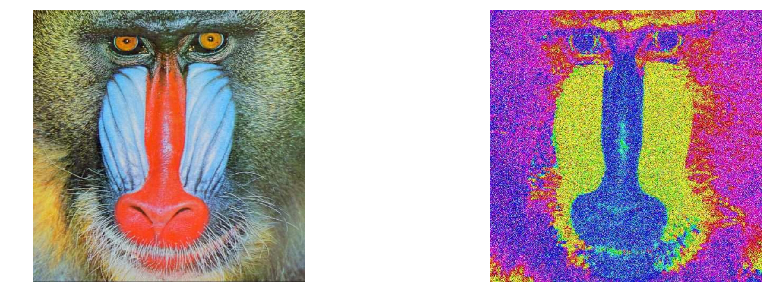

In [2]:
img1 = imread("./img/monkey.jpg")
img2 = resize(imread("./img/monkey_mod.jpg"), img1.shape)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off');

SSD


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:12<00:00,  1.65it/s]


CPU time : 0.58

MI


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


CPU time : 1.84

CoMI KYBIC


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [11:14<00:00, 32.31s/it]


CPU time : 32.12

CoMI KYBIC CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [08:14<00:00, 23.74s/it]


CPU time : 23.55

CoMI ITE


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [05:42<00:00, 16.16s/it]


CPU time : 16.29

CoMI ITE CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [05:01<00:00, 14.54s/it]


CPU time : 14.36

CoMI KRASHOV


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [1:09:00<00:00, 133.81s/it]


CPU time : 197.15

CoMI KRASHOV CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [08:37<00:00, 24.01s/it]


CPU time : 24.62



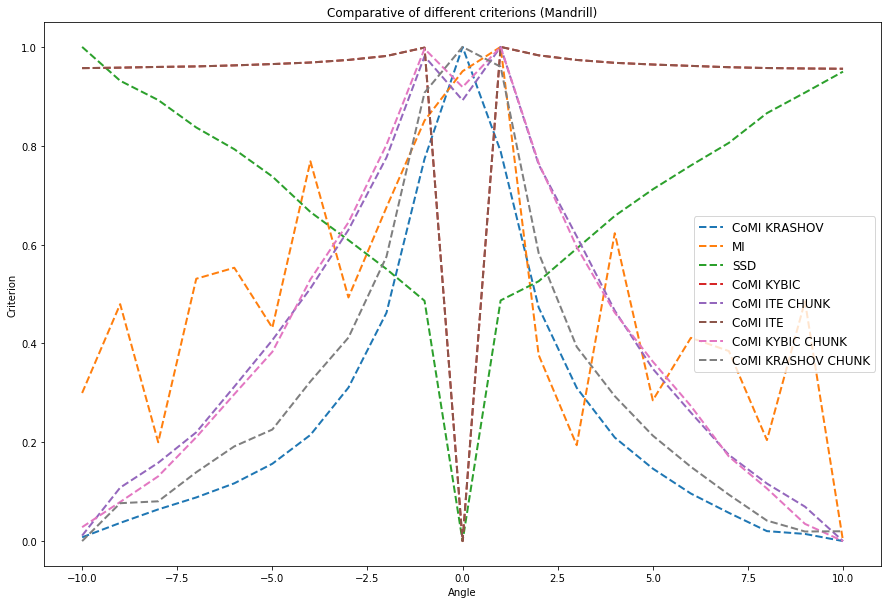

In [3]:
estimators = [SSD(), MI(), CoMI(mode = "kybic"), CoMI(mode = 'ite'), CoMI(mode = 'krashov')]
results_mandrill = {}
for estimator in estimators:
    if 'CoMI' in estimator.get_name():
        print(estimator.get_name())
        results_mandrill[estimator.get_name()], timing = test_estimator(estimator, img1, img2)
        print('CPU time : %.2f\n' % timing)
        print(estimator.get_name() + " CHUNK")
        results_mandrill[estimator.get_name() + " CHUNK"], timing = test_estimator(estimator, img1, img2, chunk = 50)
        print('CPU time : %.2f\n' % timing)
    else:
        print(estimator.get_name())
        results_mandrill[estimator.get_name()], timing = test_estimator(estimator, img1, img2)
        print('CPU time : %.2f\n' % timing)
        
joblib.dump(results_mandrill, 'results_mandrill.pkl')

plt.figure(figsize=(15, 10))
for e in results_mandrill.items():
    plt.plot(np.arange(-10, 11, 1), min_max_scaler(e[1]), label = e[0], linestyle = '--', lw = 2)
        
plt.legend(fontsize = "large")
plt.xlabel('Angle')
plt.ylabel('Criterion')
plt.title('Comparative of different criterions (Mandrill)')
plt.show();

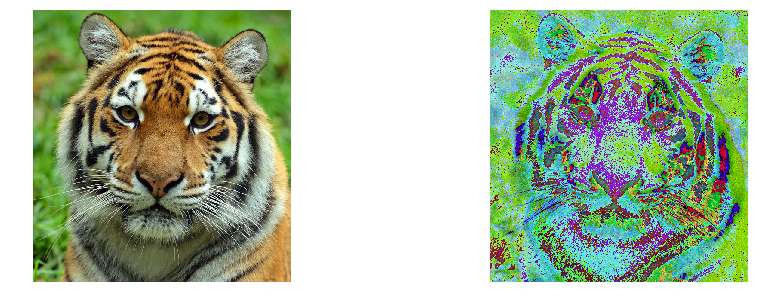

In [4]:
img1 = imread("./img/tiger.jpg")
img2 = modify(gaussian_noise(img1, sigma=0.75), hue = 5, saturation=150, value=75, mean_noise=0.01 , var_noise = 1e-7)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off');

SSD


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  3.62it/s]


CPU time : 0.27

MI


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:18<00:00,  1.11it/s]


CPU time : 0.89

CoMI KYBIC


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [04:22<00:00, 12.51s/it]


CPU time : 12.51

CoMI KYBIC CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [03:42<00:00, 10.54s/it]


CPU time : 10.60

CoMI ITE


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:22<00:00,  6.25s/it]


CPU time : 6.80

CoMI ITE CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:12<00:00,  6.32s/it]


CPU time : 6.32

CoMI KRASHOV


100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [34:53<00:00, 150.49s/it]


CPU time : 99.68

CoMI KRASHOV CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [14:53<00:00, 42.10s/it]


CPU time : 42.57



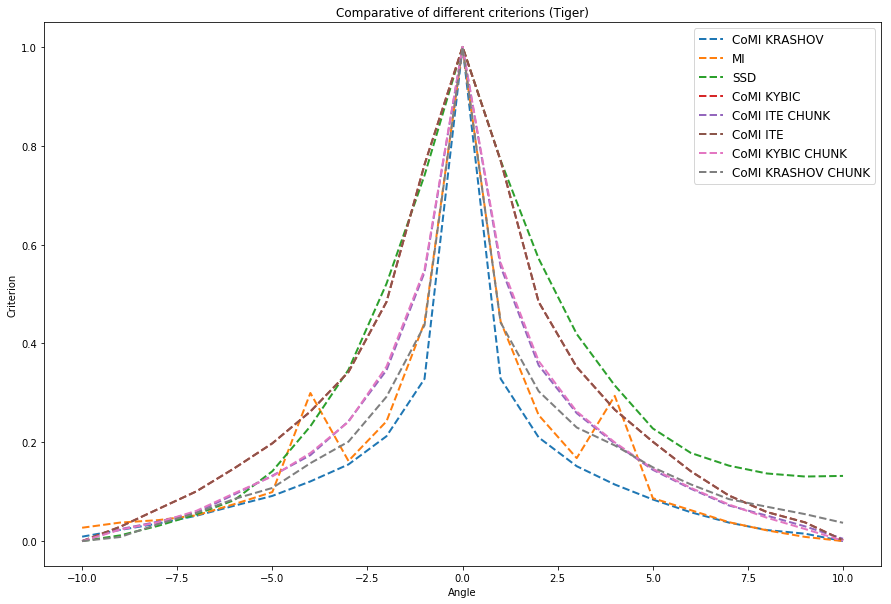

In [5]:
estimators = [SSD(), MI(), CoMI(mode = "kybic"), CoMI(mode = 'ite'), CoMI(mode = 'krashov')]
results_tiger = {}
for estimator in estimators:
    if 'CoMI' in estimator.get_name():
        print(estimator.get_name())
        results_tiger[estimator.get_name()], timing = test_estimator(estimator, img1, img2)
        print('CPU time : %.2f\n' % timing)
        print(estimator.get_name() + " CHUNK")
        results_tiger[estimator.get_name() + " CHUNK"], timing = test_estimator(estimator, img1, img2, chunk = 50)
        print('CPU time : %.2f\n' % timing)
    else:
        print(estimator.get_name())
        results_tiger[estimator.get_name()], timing = test_estimator(estimator, img1, img2)
        print('CPU time : %.2f\n' % timing)
        
joblib.dump(results_tiger, 'results_tiger.pkl')

plt.figure(figsize=(15, 10))
for e in results_tiger.items():
    plt.plot(np.arange(-10, 11, 1), min_max_scaler(e[1]), label = e[0], linestyle = '--', lw = 2)
        
plt.legend(fontsize = "large")
plt.xlabel('Angle')
plt.ylabel('Criterion')
plt.title('Comparative of different criterions (Tiger)')
plt.show();

100%|████████████████████████████████████████████████████████████████████████████████| 6/6 [1:41:39<00:00, 1802.23s/it]


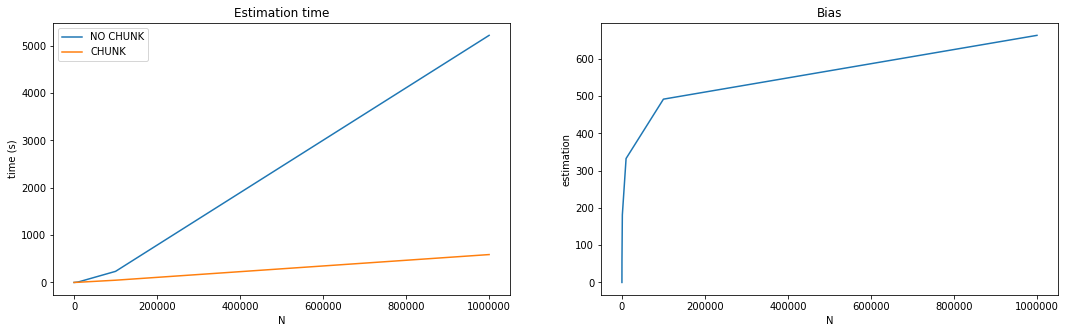

In [8]:
estimator = CoMI(mode = 'krashov')

d = 3
M = 20

grid_n = np.logspace(1, 6, 6).astype(int)

timing = []
timing_chunk = []
mi = []
mi_chunk = []

for n in tqdm(grid_n):
    x = np.random.randint(0, 256, (n, d, 3))
    y = np.random.randint(0, 256, (n, d, 3))
    tic = time.time()
    MI = estimator.get_criterion(x, y, chunk=None)
    toc = time.time()
    timing.append(toc - tic)
    mi.append(MI)
    tic = time.time()
    MI = estimator.get_criterion(x, y, chunk=20)
    toc = time.time()
    timing_chunk.append(toc - tic)
    mi_chunk.append(MI)
    
plt.figure(figsize = (18, 5))

plt.subplot(1, 2, 1)
plt.plot(grid_n, timing, label = 'NO CHUNK')
plt.plot(grid_n, timing_chunk, label = 'CHUNK')
plt.legend()
plt.xlabel('N')
plt.ylabel('time (s)')
plt.title('Estimation time')

plt.subplot(1, 2, 2)
plt.plot(grid_n, [(a-b)**2 for a,b in zip(mi, mi_chunk)])
plt.xlabel('N')
plt.ylabel('estimation')
plt.title('Bias');

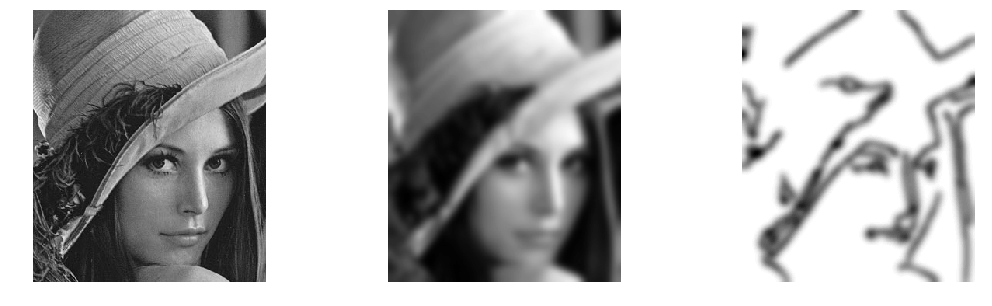

In [36]:
lena = imread('./img/lena.png')[75:425][:, 100:400]

img1 = gaussian_noise(lena).astype('float')
img2 = gaussian_noise(edge_detector(lena)).astype('float')

plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.show();

SSD


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 27.31it/s]


CPU time : 0.04

MI


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  6.02it/s]


CPU time : 0.16

NbMI KYBIC


100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [49:33<00:00, 140.89s/it]


CPU time : 141.61

NbMI KYBIC CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:13<00:00,  6.35s/it]


CPU time : 6.35

NbMI ITE


100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [52:01<00:00, 158.73s/it]


CPU time : 148.64

NbMI ITE CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [01:16<00:00,  3.64s/it]


CPU time : 3.64

NbMI KRASHOV


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [3:02:51<00:00, 555.34s/it]


CPU time : 522.44

NbMI KRASHOV CHUNK


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [15:04<00:00, 43.86s/it]


CPU time : 43.08



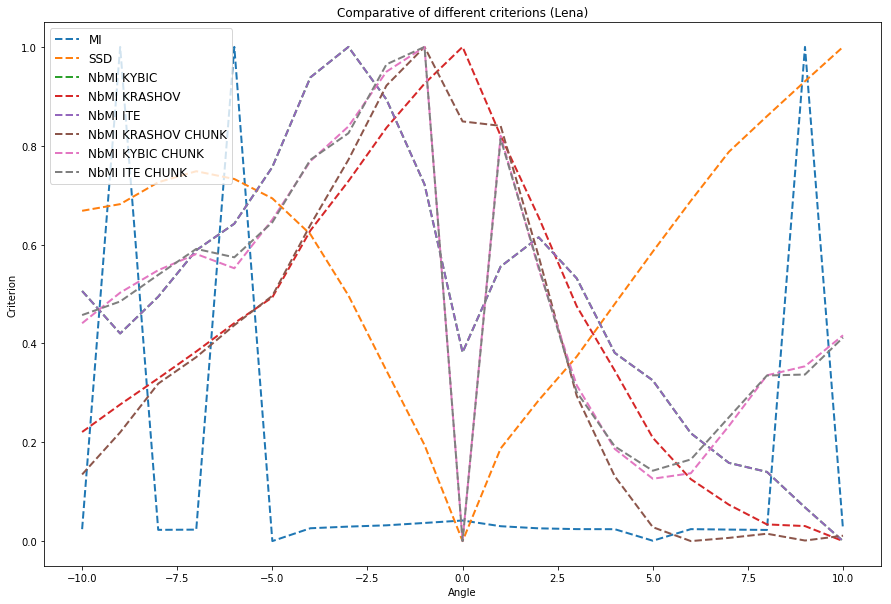

In [37]:
estimators = [SSD(), MI(), NbMI(mode = "kybic"), NbMI(mode = 'ite'), NbMI(mode = 'krashov')]

results_lena = {}
for estimator in estimators:
    if 'NbMI' in estimator.get_name():
        print(estimator.get_name())
        results_lena[estimator.get_name()], timing = test_estimator(estimator, img1, img2)
        print('CPU time : %.2f\n' % timing)
        print(estimator.get_name() + " CHUNK")
        results_lena[estimator.get_name() + " CHUNK"], timing = test_estimator(estimator, img1, img2, chunk = 20)
        print('CPU time : %.2f\n' % timing)
    else:
        print(estimator.get_name())
        results_lena[estimator.get_name()], timing = test_estimator(estimator, img1, img2, canal = None)
        print('CPU time : %.2f\n' % timing)
        
joblib.dump(results_lena, 'results_lena.pkl')

plt.figure(figsize=(15, 10))
for e in results_lena.items():
    plt.plot(np.arange(-10, 11, 1), min_max_scaler(e[1]), label = e[0], linestyle = '--', lw = 2)
        
plt.legend(fontsize = "large")
plt.xlabel('Angle')
plt.ylabel('Criterion')
plt.title('Comparative of different criterions (Lena)')
plt.show();